In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [2]:
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

#plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
#plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

In [2]:
LCDM = Class() 
LCDM.set({ 'output':'tCl',
          'N_ur': 3.044, 
          'lensing' : 'no',
          'evolver':1, 
          'background_verbose':5 })
LCDM.compute()

In [3]:
Decay = Class() 
Decay.set({ 'output':'tCl',
          'N_ur': 3.044, 
          'tau_ur' : 1.e6,
          'mass_nuH' : 0.05,
          'lensing' : 'no',
          'evolver':1, 
          'background_verbose':5 })
Decay.compute()

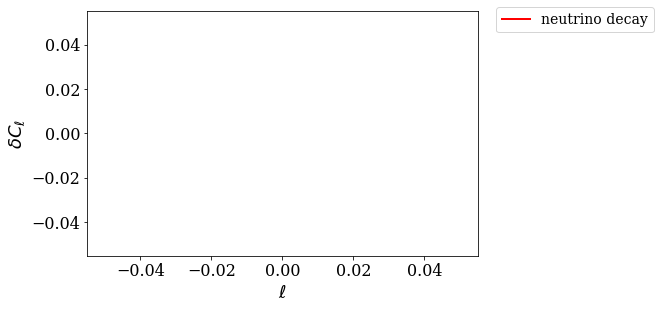

In [14]:
#Ref = cosmo
cl_Ref = LCDM.raw_cl()
#clnoint = NoInt.raw_cl()

plt.figure(figsize=(7,4.5))

cl_Decay= Decay.raw_cl()
l = cl_Ref['ell'][2:]
plt.plot(l,cl_Decay['tt'][2:]/cl_Ref['tt'][2:]-1.,label=r'neutrino decay',color='red')
plt.xlabel('$\ell$')
plt.ylabel('$\delta C_{\ell}$')
#plt.ylim([0.997,1.003])

lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045))

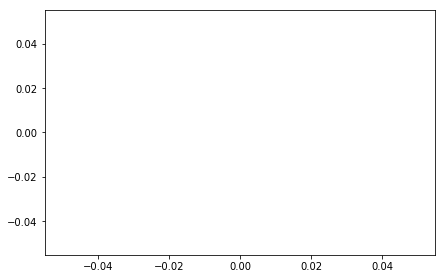

In [4]:
cl_Ref = LCDM.raw_cl()
#clnoint = NoInt.raw_cl()

plt.figure(figsize=(7,4.5))

#cl_Decay= Decay.raw_cl()
l = cl_Ref['ell'][2:]
plt.plot(l,cl_Ref['tt'][2:],label=r'neutrino decay',color='red')
#plt.xlabel('$\ell$')
#plt.ylabel('$\delta C_{\ell}$')
#plt.ylim([0.997,1.003])

#lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045))

##### RefMassless = Standard_massless
clRefMassless = RefMassless.raw_cl()
#clnoint = NoInt.raw_cl()

Geff_exp_vec = [4.,3.,2.,1.]

from itertools import cycle
colors = ["Blue","Green","Red","Cyan"]
colorcycler = cycle(colors)
lines = [":","--","-."]
linecycler = cycle(lines)

plt.figure(figsize=(7,4.5))

for idx, G in enumerate(Geff_vec):
    colour = next(colorcycler)
    Geff_exp = Geff_exp_vec[idx]
    cl_MasslessRTA= MasslessRTA[G].raw_cl()
    l = cl_MasslessRTA['ell'][2:]
    plt.plot(l,cl_MasslessRTA['tt'][2:]/clRefMassless['tt'][2:]-1.,label=r'massless,$ G_\mathrm{eff}=10^{-'+"{:g}".format(Geff_exp)+'} \,\mathrm{MeV}^{-2}$',ls='-',color=colour)
    plt.xlabel('$\ell$')
    plt.ylabel('$\delta C_{\ell}$')
    plt.ylim([0.,0.01])

for m_idx, m in enumerate(mass_vec):
    linestyle = next(linecycler)
    for idx, G in enumerate(Geff_vec):
        colour = next(colorcycler)
        Geff_exp = Geff_exp_vec[idx]
        RefMassive = MassiveStandard[m]
        clRefMassive = RefMassive.raw_cl()
        cl_MassiveRTA= MassiveRTA[m,G].raw_cl()
        l = cl_MassiveRTA['ell'][2:]
        plt.plot(l,cl_MassiveRTA['tt'][2:]/clRefMassive['tt'][2:]-1.,label=r'$m_{\nu}='+"{:g}".format(m)+' \mathrm{eV}, G_\mathrm{eff}=10^{-'+"{:g}".format(Geff_exp)+'} \,\mathrm{MeV}^{-2}$',ls=linestyle,color=colour)
        plt.xlabel('$\ell$')
        plt.ylabel('$\delta C_{\ell}$')
#plt.ylim([0.997,1.003])

lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045))

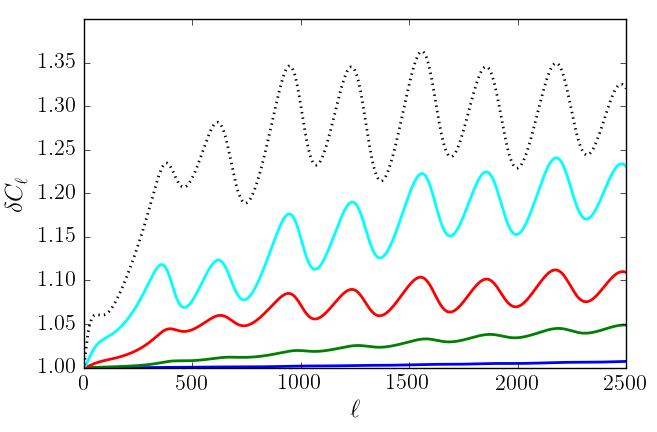

In [13]:
RefMassless = Standard_massless
clRefMassless = RefMassless.raw_cl()
#clnoint = NoInt.raw_cl()

Geff_exp_vec = [4.,3.,2.,1.]

from itertools import cycle
colors = ["Blue","Green","Red","Cyan"]
colorcycler = cycle(colors)

plt.figure(figsize=(7,4.5))

for idx, G in enumerate(Geff_vec):
    colour = next(colorcycler)
    Geff_exp = Geff_exp_vec[idx]
    cl_MasslessRTA= MasslessRTA[G].raw_cl()
    l = cl_MasslessRTA['ell'][2:]
    plt.plot(l,cl_MasslessRTA['tt'][2:]/clRefMassless['tt'][2:],label=r'massless,$ G_\mathrm{eff}=10^{-'+"{:g}".format(Geff_exp)+'} \,\mathrm{MeV}^{-2}$',ls='-',color=colour)
    plt.xlabel('$\ell$')
    plt.ylabel('$\delta C_{\ell}$')

cl_TCA= Tightly_coupled.raw_cl()    
plt.plot(l,cl_TCA['tt'][2:]/clRefMassless['tt'][2:],label=r'tigthly coupled',ls=':',color='Black')
#plt.ylim([0.997,1.003])

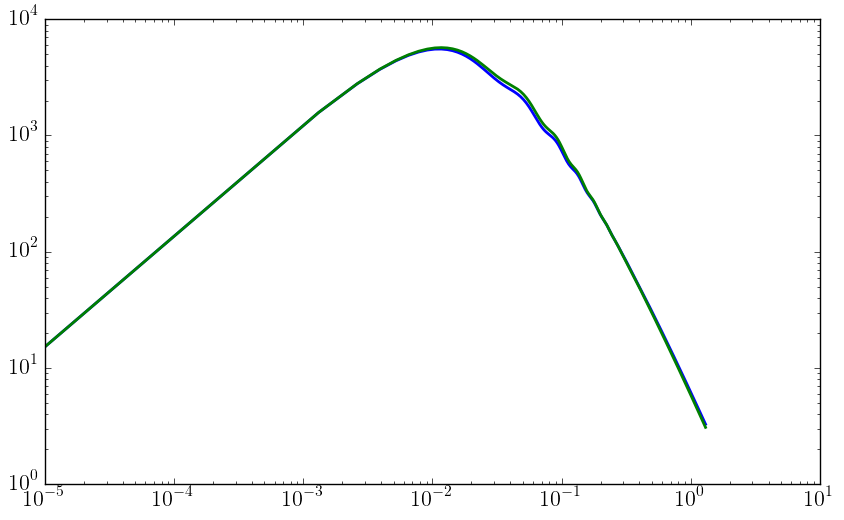

In [14]:
#kvec = np.logspace(-4.,0.4,100)
kvec= np.linspace(0.00001,1.3,1000)
PkRefMassless = []
PkMasslessRTA = []

for k in kvec :
    PkRefMassless.append(Standard_massless.pk(k,4.))
    PkMasslessRTA.append(MasslessRTA[1e-1].pk(k,4.))
plt.loglog(kvec,PkRefMassless,kvec,PkMasslessRTA)

(0.001, 2.0)

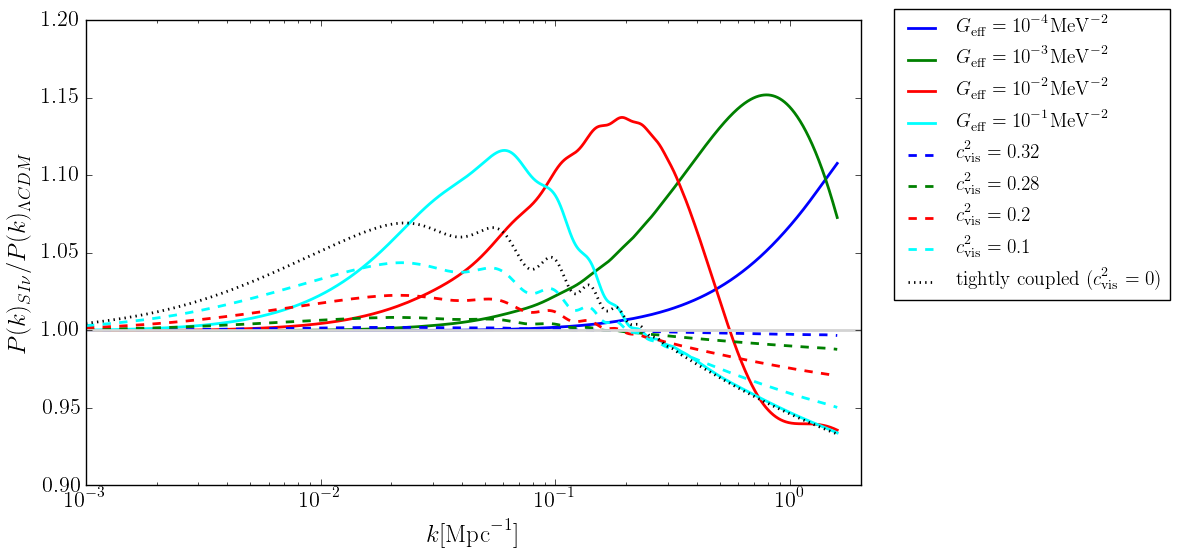

In [18]:
#kvec = np.logspace(-4.,0.4,100)
kvec= np.logspace(-3.,0.2,10000)

PkRatio4 =[]
PkRatio3 =[]
PkRatio2 =[]
PkRatio1 =[]

PkRatioTCA =[]
PkRatioCvis2 =[]

PkRatioCvis32 =[]
PkRatioCvis28 =[]
PkRatioCvis2 =[]
PkRatioCvis1 =[]

PkRatioMassless_lmax =[]

for k in kvec :
    PkRatio4.append(MasslessRTA[1e-4].pk(k,4.)/Standard_massless.pk(k,4.))
    PkRatio3.append(MasslessRTA[1e-3].pk(k,4.)/Standard_massless.pk(k,4.))
    PkRatio2.append(MasslessRTA[1e-2].pk(k,4.)/Standard_massless.pk(k,4.))
    PkRatio1.append(MasslessRTA[1e-1].pk(k,4.)/Standard_massless.pk(k,4.))
    PkRatioCvis32.append(Cvis2Ceff2[0.32].pk(k,4.)/Standard_massless.pk(k,4.))
    PkRatioCvis28.append(Cvis2Ceff2[0.28].pk(k,4.)/Standard_massless.pk(k,4.))
    PkRatioCvis2.append(Cvis2Ceff2[0.2].pk(k,4.)/Standard_massless.pk(k,4.))
    PkRatioCvis1.append(Cvis2Ceff2[0.1].pk(k,4.)/Standard_massless.pk(k,4.))
    PkRatioTCA.append(Tightly_coupled.pk(k,4.)/Standard_massless.pk(k,4.))
    #PkRatioMassless_lmax.append(Massless_lmax.pk(k,4.)/Standard_massless.pk(k,4.))
    #PkRatioCvis2.append(Cvis2.pk(k,4.)/Standard_massless.pk(k,4.))
plt.semilogx(kvec,PkRatio4,color="Blue",label=r'$G_{\mathrm{eff}}=10^{-4} \mathrm{MeV}^{-2}$')
plt.semilogx(kvec,PkRatio3,color="Green",label=r'$G_{\mathrm{eff}}=10^{-3} \mathrm{MeV}^{-2}$')
plt.semilogx(kvec,PkRatio2,color="Red",label=r'$G_{\mathrm{eff}}=10^{-2} \mathrm{MeV}^{-2}$')
plt.semilogx(kvec,PkRatio1,color="Cyan",label=r'$G_{\mathrm{eff}}=10^{-1} \mathrm{MeV}^{-2}$')
plt.semilogx(kvec,PkRatioCvis32,color="Blue",label=r'$c_{\mathrm{vis}}^2=0.32$',ls='--')
plt.semilogx(kvec,PkRatioCvis28,color="Green",label=r'$c_{\mathrm{vis}}^2=0.28$',ls='--')
plt.semilogx(kvec,PkRatioCvis2,color="Red",label=r'$c_{\mathrm{vis}}^2=0.2$',ls='--')
plt.semilogx(kvec,PkRatioCvis1,color="Cyan",label=r'$c_{\mathrm{vis}}^2=0.1$',ls='--')
plt.semilogx(kvec,PkRatioTCA,color="Black",label=r'tightly coupled ($c_{\mathrm{vis}}^2=0$)',ls=':')
#plt.semilogx(kvec,PkRatioMassless_lmax,color="Orange")
#plt.semilogx(kvec,PkRatioCvis2,color="Black",label=r'$c_{\mathrm{vis}}^2=0.30$',ls='--')
plt.axhline(y=1.0,color='Lightgray')

plt.xlabel('$k [\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k)_{SI\nu}/P(k)_{\Lambda CDM}$')
lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045))
plt.xlim((0.001, 2.))
#plt.savefig("Pk_ratio_b.pdf",bbox_extra_artists=(lgd,), bbox_inches='tight')

(0.001, 2.0)

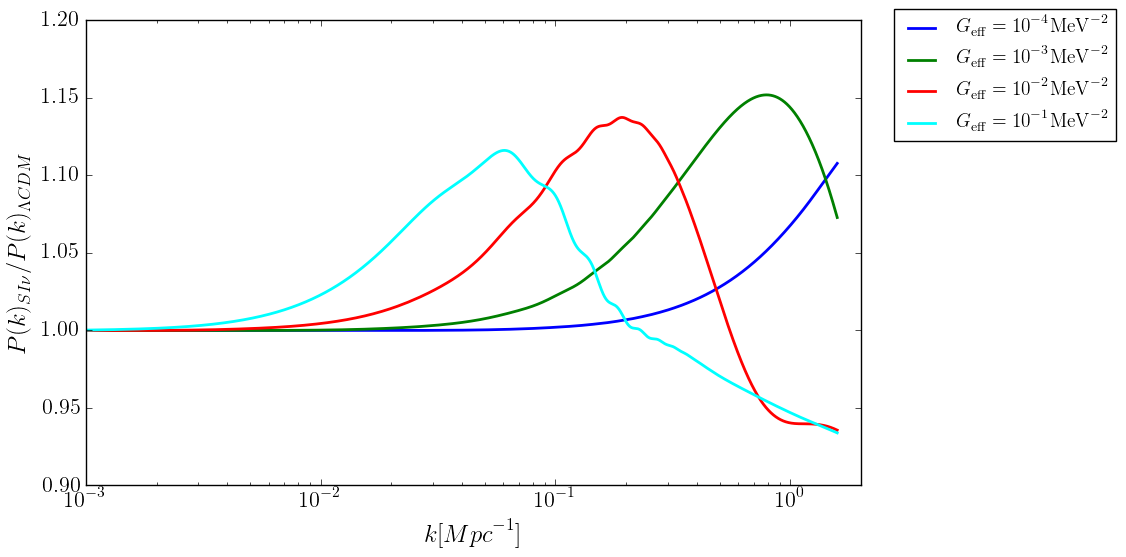

In [16]:
kvec= np.logspace(-3.,0.2,10000)

PkRatio4 =[]
PkRatio3 =[]
PkRatio2 =[]
PkRatio1 =[]

for k in kvec :
    PkRatio4.append(MasslessRTA[1e-4].pk(k,4.)/Standard_massless.pk(k,4.))
    PkRatio3.append(MasslessRTA[1e-3].pk(k,4.)/Standard_massless.pk(k,4.))
    PkRatio2.append(MasslessRTA[1e-2].pk(k,4.)/Standard_massless.pk(k,4.))
    PkRatio1.append(MasslessRTA[1e-1].pk(k,4.)/Standard_massless.pk(k,4.))
plt.semilogx(kvec,PkRatio4,color="Blue",label=r'$G_{\mathrm{eff}}=10^{-4} \mathrm{MeV}^{-2}$')
plt.semilogx(kvec,PkRatio3,color="Green",label=r'$G_{\mathrm{eff}}=10^{-3} \mathrm{MeV}^{-2}$')
plt.semilogx(kvec,PkRatio2,color="Red",label=r'$G_{\mathrm{eff}}=10^{-2} \mathrm{MeV}^{-2}$')
plt.semilogx(kvec,PkRatio1,color="Cyan",label=r'$G_{\mathrm{eff}}=10^{-1} \mathrm{MeV}^{-2}$')

plt.xlabel('$k [Mpc^{-1}]$')
plt.ylabel(r'$P(k)_{SI\nu}/P(k)_{\Lambda CDM}$')
lgd = plt.legend(loc='upper left',ncol=1,bbox_to_anchor=(1.03, 1.045))
plt.xlim((0.001, 2.))
#plt.savefig("Pk_ratio.pdf",bbox_extra_artists=(lgd,), bbox_inches='tight')